# ***Outline***

This data set is a compilation state expenditure, student demographic, and 4th and 8th grade math and reading scores. This project is trying to create a model that can predict student scores based on these features.

# ***Data***

## ***Upload Data***

import sys
!conda install --yes --prefix {sys.prefix} numpy

In [1]:
import os

In [2]:
import pandas as pd

In [3]:
DATA_PATH = '/Users/jisha/Unit 240_Build_Week/data/'
states = pd.read_csv(DATA_PATH + 'states_all_extended.csv')
finances = pd.read_csv(DATA_PATH + 'finance_states.csv')

In [4]:
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [5]:
finances.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,1992_ALASKA,ALASKA,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [6]:
states.shape, finances.shape

((1492, 193), (1326, 13))

## ***Update Data***

### ***Merging Tail***

* merging the tail of both dataframes before concating

In [7]:
state_tail = pd.DataFrame(states.tail(51))
finance_tail = pd.DataFrame(finances.tail(51)) #I just need the last 51 rows

In [8]:
state_tail.shape, finance_tail.shape

((51, 193), (51, 13))

In [9]:
columns = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE',
           'STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
           'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
state_tail = state_tail.drop(columns=columns) #Dropping unnecessary columns from state_tail, so I do not have to do this later

In [10]:
merge = pd.merge(finance_tail, state_tail, on=['PRIMARY_KEY','STATE', 'YEAR'])

In [11]:
merge.shape

(51, 193)

In [12]:
merge.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2017_ALABAMA,ALABAMA,2017,744930.0,7911674,811407,4350594,2749673,8031412,4046379,...,NaN,NaN,NaN,NaN,NaN,NaN,232.170688,268.312020,216.419814,257.686520
1,2017_ALASKA,ALASKA,2017,132737.0,2504501,350204,1600503,553794,2587060,1266077,...,NaN,NaN,NaN,NaN,NaN,NaN,230.456278,277.015572,207.037630,257.667497
2,2017_ARIZONA,ARIZONA,2017,936147.0,8677631,1178196,3446191,4053244,8389808,4081153,...,NaN,NaN,NaN,NaN,NaN,NaN,234.435788,282.248145,215.465952,262.957457
3,2017_ARKANSAS,ARKANSAS,2017,478996.0,5481422,597260,4137903,746259,5479899,2691959,...,NaN,NaN,NaN,NaN,NaN,NaN,233.848144,273.759907,216.108026,259.955798
4,2017_CALIFORNIA,CALIFORNIA,2017,6195344.0,91803968,7889546,51046506,32867916,90161939,44748095,...,NaN,NaN,NaN,NaN,NaN,NaN,232.262941,276.638200,215.421814,262.520630


### ***Concatenating Data***

In [13]:
head = states.head(1441)

In [14]:
df = head.append(merge)

# ***Data Exploration***

In [15]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [16]:
df.tail() #Checking that it merged correctly

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,2017_VIRGINIA,VIRGINIA,2017,1286711.0,16822120.0,1131679.0,6565670.0,9124771.0,17271169.0,9313733.0,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
47,2017_WASHINGTON,WASHINGTON,2017,1098187.0,15764749.0,1068053.0,9822674.0,4874022.0,16126035.0,7613934.0,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
48,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,273170.0,3490687.0,403856.0,1872045.0,1214786.0,3416235.0,1812983.0,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
49,2017_WISCONSIN,WISCONSIN,2017,855924.0,12104649.0,802599.0,6197033.0,5105017.0,12026422.0,6043577.0,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304
50,2017_WYOMING,WYOMING,2017,93925.0,1932978.0,117807.0,1141557.0,673614.0,1927490.0,918465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,247.820619,288.761812,226.831211,269.371456


In [17]:
#How many observations are available
df.shape

(1492, 193)

In [18]:
#Are there any columns with null values?
df.isna().sum()

PRIMARY_KEY               0
STATE                     0
YEAR                      0
ENROLL                  212
TOTAL_REVENUE           161
                       ... 
GRADES_ALL_TRF         1166
AVG_MATH_4_SCORE        956
AVG_MATH_8_SCORE        960
AVG_READING_4_SCORE     959
AVG_READING_8_SCORE     994
Length: 193, dtype: int64

In [19]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.280000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.280000e+03,...,343.000000,343.000000,343.000000,343.000000,343.000000,326.000000,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.174300e+05,9.274162e+06,7.785491e+05,4.300729e+06,4.194885e+06,9.375933e+06,4.858815e+06,2.734451e+06,4.363877e+05,...,1028.244898,858.005831,688.883382,8177.699708,3181.918367,10159.435583,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.068204e+06,1.205160e+07,1.157786e+06,5.685300e+06,5.641828e+06,1.227319e+07,6.458443e+06,3.439435e+06,5.448701e+05,...,1342.500562,1137.723466,1010.942102,10627.763472,4529.779883,10692.452016,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.617798e+05,2.210191e+06,1.911455e+05,1.174059e+06,7.358395e+05,2.188797e+06,1.179241e+06,6.460350e+05,1.054122e+05,...,169.500000,122.000000,76.000000,1364.000000,398.000000,1884.250000,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.521425e+05,5.171631e+06,4.160630e+05,2.570987e+06,2.089445e+06,5.298267e+06,2.701637e+06,1.545738e+06,2.764680e+05,...,557.000000,442.000000,350.000000,4726.000000,1572.000000,6454.500000,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014540e+06,1.111990e+07,8.462290e+05,5.185174e+06,4.843230e+06,1.087317e+07,5.641158e+06,3.317215e+06,5.267228e+05,...,1353.000000,1076.500000,857.000000,10444.000000,3987.000000,13967.000000,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,9.180397e+07,9.990221e+06,5.104651e+07,3.800098e+07,9.016194e+07,4.514133e+07,2.757241e+07,4.211532e+06,...,9149.000000,7131.000000,6890.000000,71139.000000,28985.000000,49175.000000,253.420961,300.568235,236.773867,280.499130


All columns, except State and Primary Key, are numeric. This means that other than data cleaning, I can try all the columns since these are not high cardinality categorical columns.

# ***Choose your evaluation metric(s)***

In [20]:
target_df = df[['PRIMARY_KEY','STATE','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE' ]].copy()
target_df.head()

,PRIMARY_KEY,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,208.398961,260.892247,196.764414,NaN


Using 8th grade reading. Creating a classification class by grouping the scores into different categories. I think this will give more information then the numeric values.

Noticings: Unfortunately, the state scores are not very good for any of the states for any of the years. Most states, across both Math and Reading, have underperformed; only a small percentage scored proficient.

## 8th Grade Reading

### ***Data Cleaning***

In [21]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_READING_8_SCORE'] = target_df.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [22]:
target_df['AVG_READING_8_SCORE'].isnull().sum()

161

In [23]:
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].fillna(0)
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].astype(int)
target_df['AVG_READING_8_SCORE']

0     264
1     258
2     262
3     264
4     261
     ... 
46    273
47    267
48    271
49    258
50    269
Name: AVG_READING_8_SCORE, Length: 1492, dtype: int64

In [24]:
target_df['AVG_READING_8_SCORE'].value_counts()

264    218
263    191
265    163
0      161
262    134
261    117
266    105
260     70
267     47
259     35
268     34
269     32
270     21
257     19
258     18
272     14
251     13
255     12
253     11
254     10
273      9
271      9
256      8
274      7
252      7
250      6
277      3
275      3
276      2
247      2
238      2
242      2
239      1
236      1
249      1
240      1
246      1
248      1
280      1
Name: AVG_READING_8_SCORE, dtype: int64

In [25]:
min(target_df['AVG_READING_8_SCORE']), max(target_df['AVG_READING_8_SCORE'])

(0, 280)

NAEP Reading Score Breakdown
- basic (0-280)
> This column was broken down into 3 categories: 
> - low, 
> - mid, and 
> - high basic
- proficient (281-322)
- advanced (323-500)

In [26]:
def proficiency(row):
  #separating basic into 3 groups (0-281)
    if 0< row['AVG_READING_8_SCORE'] < 240:
        val = '1'
    elif 240 <= row['AVG_READING_8_SCORE'] < 265:
        val = '2'
    elif 265 <= row['AVG_READING_8_SCORE'] < 281:
        val = '3'
    elif 281 <= row['AVG_READING_8_SCORE'] < 323:
        val = '4'
    elif row['AVG_READING_8_SCORE'] >= 323:
        val = '5'
    else:
        val = 0
    return val

target_df['READING_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['READING_PROF_8'].astype('int')

0     2
1     2
2     2
3     2
4     2
     ..
46    3
47    3
48    3
49    2
50    3
Name: READING_PROF_8, Length: 1492, dtype: int64

In [27]:
target_df['READING_PROF_8'].value_counts(normalize=True)

2    0.587802
3    0.301609
0    0.107909
1    0.002681
Name: READING_PROF_8, dtype: float64

## 8th Grade Math

### ***Data Cleaning***

In [28]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_MATH_8_SCORE'] = target_df.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [29]:
target_df['AVG_MATH_8_SCORE'].isnull().sum()

161

In [30]:
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].fillna(0)
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].astype(int)
target_df['AVG_MATH_8_SCORE']

0     252
1     280
2     265
3     256
4     260
     ... 
46    290
47    289
48    273
49    288
50    288
Name: AVG_MATH_8_SCORE, Length: 1492, dtype: int64

In [31]:
target_df['AVG_MATH_8_SCORE'].value_counts()

0      161
283    115
282    101
280     72
287     68
273     60
277     57
288     55
285     54
284     54
279     49
275     47
286     47
274     46
278     46
270     45
281     44
269     40
271     28
289     27
272     25
262     25
290     24
266     24
265     23
291     23
263     21
250     18
276     13
268     11
267      7
292      6
294      6
259      5
260      5
264      4
261      4
293      4
258      3
256      2
234      2
252      2
297      2
253      2
295      2
298      2
296      2
254      1
257      1
249      1
248      1
246      1
245      1
243      1
232      1
300      1
Name: AVG_MATH_8_SCORE, dtype: int64

In [32]:
min(target_df['AVG_MATH_8_SCORE']), max(target_df['AVG_MATH_8_SCORE'])

(0, 300)

NAEP Math Score Breakdown
- basic (0-298)
> This column was broken down into 3 categories:
> -  low, 
> - mid, and 
> - high basic
- proficient (298-332)
- advanced (333-500)

In [33]:
def proficiency(row):
    if 0 < row['AVG_MATH_8_SCORE'] < 270:
        val = '1'
    elif 270 <= row['AVG_MATH_8_SCORE'] < 280:
        val = '2 '
    elif 280 <= row['AVG_MATH_8_SCORE'] < 299:
        val = '3'    
    elif 299 <= row['AVG_MATH_8_SCORE'] < 333:
        val = '4'
    elif row['AVG_MATH_8_SCORE'] >= 333:
        val = '5'
    else:
        val = 0
    return val

target_df['MATH_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['MATH_PROF_8'].astype('int')

0     1
1     3
2     1
3     1
4     1
     ..
46    3
47    3
48    2
49    3
50    3
Name: MATH_PROF_8, Length: 1492, dtype: int64

In [34]:
target_df['MATH_PROF_8'].value_counts(normalize=True)

3     0.474531
2     0.278820
1     0.138070
0     0.107909
4     0.000670
Name: MATH_PROF_8, dtype: float64

# ***Target***

Adding the two new engineered features back into the dataframe

In [35]:
df = df.drop(columns = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'])

In [36]:
df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8', 'MATH_PROF_8']] = target_df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8','MATH_PROF_8' ]].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,208.327876,207.963517,264,252,2,1
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,258,280,2,3
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,215.253932,206.212716,262,265,2,1
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,210.206028,208.634458,264,256,2,1
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,208.398961,196.764414,261,260,2,1


In [37]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [38]:
df.dtypes

PRIMARY_KEY             object
STATE                   object
YEAR                     int64
ENROLL                 float64
TOTAL_REVENUE          float64
                        ...   
AVG_READING_4_SCORE    float64
AVG_READING_8_SCORE      int64
AVG_MATH_8_SCORE         int64
READING_PROF_8           int64
MATH_PROF_8              int64
Length: 195, dtype: object

# ***Train/Val/Test***

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train = df[df['YEAR'] < 2013]
test = df[df['YEAR'] >= 2013]
train.shape, test.shape

((1219, 195), (273, 195))

In [41]:
min(train['YEAR']), max(train['YEAR'])

(1992, 2012)

In [42]:
min(test['YEAR']), max(test['YEAR'])

(2013, 2017)

In [43]:
train, val = train_test_split(
    train, train_size=0.60, test_size=0.40,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((731, 195), (488, 195), (273, 195))

# ***Testing for Data Leakage***

In [44]:
!pip install category_encoders

In [45]:
%matplotlib inline
import category_encoders as ce

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [46]:
train = train.fillna('Missing')
val = val.fillna('Missing')
test = test.fillna('Missing')

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Arrange data into X features matrix and y target vector
target = 'READING_PROF_8'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

pipeline_dt = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline_dt.fit(X_train, y_train)
print('Validation Accuracy', pipeline_dt.score(X_val, y_val))

Validation Accuracy 0.9959016393442623


In [48]:
!pip install graphviz

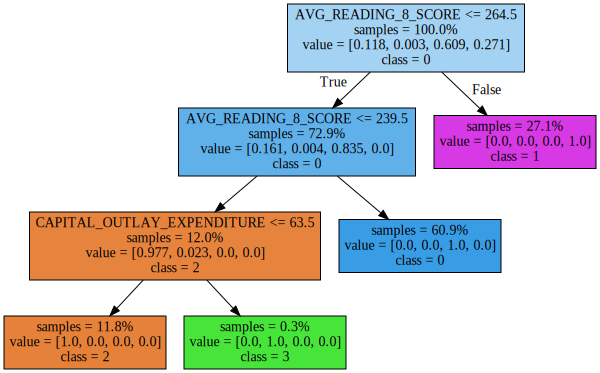

In [49]:
# Visualize decision tree
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline_dt.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False, 
    proportion=True)

graphviz.Source(dot_data)

# ***Rerunning***

In [50]:
df = head.append(merge)

In [51]:
df = df.drop(columns = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'])

In [52]:
df[['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE','MATH_PROF_8','READING_PROF_8']] = target_df[['AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE','MATH_PROF_8','READING_PROF_8']].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,208.327876,207.963517,252,264,1,2
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,280,258,3,2
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,215.253932,206.212716,265,262,1,2
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,210.206028,208.634458,256,264,1,2
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,208.398961,196.764414,260,261,1,2


In [53]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [54]:
train = df[df['YEAR'] <= 2013]
test = df[df['YEAR'] > 2013]
train.shape, test.shape

((1277, 195), (215, 195))

In [55]:
train, val = train_test_split(
    train, train_size=0.60, test_size=0.40,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((766, 195), (511, 195), (215, 195))

### ***Cleaning Data***

TO DO:
- There are several columns that do not have any data. 

**DROP**
- primary key (this is just a combination of state and year
- Since this model is trying to predict scores for each state, I will be dropping the years that do not have any recorded scores. 
- This data contains information for all 50 states, including Washington D.C, as well as US territories. Unfortunately, there is not information about expenditure for those columns, so that information will be dropped as well. 
- I will create a new dataframe which has the breakdown of demographics and then delete those columns from this dataframe. The demographics info was not captured until 2009, that will be too many np.nan values to use to build a useful model. 



In [56]:
train.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF',
       'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_8_SCORE', 'MATH_PROF_8', 'READING_PROF_8'],
      dtype='object', length=195)

### ***Feature Engineering***

- For this dataset, I would delete the years where the NAEP test scores are not available since that does not give anything for me to train/validate/test the data on. The data is from 1992 - 2017. The NAEP only gives information for the years 1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017. ✓
- I will also delete the years where I do not have the finacial information available ✓
- I am using information from the consumer price index to create new columns that adjust revenue and expenditures to reflect inflation ✓
- look at %of total revenue spent on education✓
- look at % of total expenditure spent on instruction, support other, and capital outlay✓

#### State Averages
* replacing nulls with state averages

In [57]:
train.groupby('STATE').mean()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_8_SCORE,MATH_PROF_8,READING_PROF_8
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2002.900000,733965.900000,5.500469e+06,568936.200000,3.194067e+06,1.737466e+06,5.624908e+06,2.914756e+06,1.620027e+06,451126.900000,...,NaN,NaN,NaN,NaN,225.645299,210.408278,263.000000,264.700000,1.000000,2.200000
ALASKA,2004.333333,130848.733333,1.691878e+06,265068.933333,1.021510e+06,4.052985e+05,1.819245e+06,8.951511e+05,6.266891e+05,58791.533333,...,263.20,3073.800000,1166.2,4334.200000,234.186236,210.913963,280.200000,263.800000,2.800000,2.333333
AMERICAN_SAMOA,2002.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
ARIZONA,2003.176471,875459.062500,6.549546e+06,783975.470588,2.760691e+06,3.004879e+06,6.605608e+06,3.032112e+06,2.051728e+06,323763.562500,...,480.75,5919.250000,2277.0,8251.250000,227.348464,208.783949,274.176471,263.176471,1.882353,2.176471
ARKANSAS,2002.000000,437997.083333,3.259555e+06,371155.769231,2.305379e+06,5.830208e+05,3.387348e+06,1.724709e+06,1.005450e+06,254008.833333,...,188.00,2359.000000,879.5,3341.750000,226.369523,213.676209,268.692308,264.538462,1.769231,2.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRGIN_ISLANDS,2003.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,33.000000,44.5,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
WASHINGTON,2001.866667,995417.000000,8.413861e+06,657610.466667,5.289223e+06,2.467028e+06,8.648341e+06,4.227706e+06,2.509973e+06,377268.466667,...,1753.00,17804.000000,7526.5,25543.500000,240.417536,222.917322,284.666667,264.933333,3.000000,2.933333
WEST_VIRGINIA,2002.666667,293047.888889,2.608390e+06,262479.777778,1.534276e+06,8.116347e+05,2.557555e+06,1.413668e+06,7.827014e+05,167582.555556,...,55.50,1566.500000,278.0,2077.000000,229.120583,216.162878,269.111111,265.888889,1.222222,2.888889


#### Adjustment for Inflation
I am using information from the consumer price index to create new columns that adjust expenditures to reflect inflation ✓
* https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
* https://www.usinflationcalculator.com/frequently-asked-questions-faqs/#HowInflationCalculatorWorks

In [58]:
import numpy as np

In [59]:
cpi = {1992: 140.3,
       1993: 144.5,
       1994: 148.2,
       1995: 152.4,
       1996: 156.9,
       1997: 160.5,
       1998: 163.0,
       1999: 166.6,
       2000: 172.2,
       2001: 177.1,
       2002: 179.9,
       2003: 184.0,
       2004: 188.9,
       2005: 195.3,
       2006: 201.6,
       2007: 207.3,
       2008: 215.303,
       2009: 214.537,
       2010: 218.056,
       2011: 224.939,
       2012: 229.594,
       2013: 232.957,
       2014: 236.736,
       2015: 237.017,
       2016: 240.007,
       2017: 245.120,
       2018: 251.107,
       2019: 255.657}

In [60]:
baseline_year = 2019
baseline_inflation = cpi[baseline_year]
print(baseline_inflation)

255.657


In [61]:
def inflation_adjustment(row, baseline_inflation, src):
    return row[src] * (baseline_inflation/ cpi[row['YEAR']])

### ***Wrangle***

In [62]:
import numpy as np

In [63]:
def wrangle(X):
    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.replace (0, np.NaN)

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    #Dropping rows if they do not contain any score data, will not drop if there is just 1 value
    X = X.dropna(axis=0, subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], how = 'any')

    #Dropping rows that do not contain any financial information
    X = X.dropna(axis=0, subset = ['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE'], how = 'all')

    #Dropping columns
    #Primary Key is just State and Year
    #Dropping breakdown of demographics into male/female because this does not start to get recorded until 2009
    drop = ['PRIMARY_KEY',
            'GRADES_PK_HP','GRADES_KG_HP','GRADES_4_HP','GRADES_8_HP','GRADES_12_HP', 'GRADES_1_8_HP', 'GRADES_9_12_HP', 'GRADES_ALL_HP',
            'GRADES_PK_TR','GRADES_KG_TR','GRADES_4_TR','GRADES_8_TR','GRADES_12_TR', 'GRADES_1_8_TR', 'GRADES_9_12_TR', 'GRADES_ALL_TR',
            'GRADES_PK_AMM','GRADES_KG_AMM','GRADES_4_AMM','GRADES_8_AMM','GRADES_12_AMM', 'GRADES_1_8_AMM', 'GRADES_9_12_AMM', 'GRADES_ALL_AMM',
            'GRADES_PK_AMF','GRADES_KG_AMF','GRADES_4_AMF','GRADES_8_AMF','GRADES_12_AMF', 'GRADES_1_8_AMF', 'GRADES_9_12_AMF', 'GRADES_ALL_AMF',
            'GRADES_PK_ASM','GRADES_KG_ASM','GRADES_4_ASM','GRADES_8_ASM','GRADES_12_ASM', 'GRADES_1_8_ASM', 'GRADES_9_12_ASM', 'GRADES_ALL_ASM',
            'GRADES_PK_ASF','GRADES_KG_ASF','GRADES_4_ASF','GRADES_8_ASF','GRADES_12_ASF', 'GRADES_1_8_ASF', 'GRADES_9_12_ASF', 'GRADES_ALL_ASF',
            'GRADES_PK_HIM','GRADES_KG_HIM','GRADES_4_HIM','GRADES_8_HIM','GRADES_12_HIM', 'GRADES_1_8_HIM', 'GRADES_9_12_HIM', 'GRADES_ALL_HIM',
            'GRADES_PK_HIF','GRADES_KG_HIF','GRADES_4_HIF','GRADES_8_HIF','GRADES_12_HIF', 'GRADES_1_8_HIF', 'GRADES_9_12_HIF', 'GRADES_ALL_HIF',
            'GRADES_PK_BLM','GRADES_KG_BLM','GRADES_4_BLM','GRADES_8_BLM','GRADES_12_BLM', 'GRADES_1_8_BLM', 'GRADES_9_12_BLM', 'GRADES_ALL_BLM',
            'GRADES_PK_BLF','GRADES_KG_BLF','GRADES_4_BLF','GRADES_8_BLF','GRADES_12_BLF', 'GRADES_1_8_BLF', 'GRADES_9_12_BLF', 'GRADES_ALL_BLF',
            'GRADES_PK_WHM','GRADES_KG_WHM','GRADES_4_WHM','GRADES_8_WHM','GRADES_12_WHM', 'GRADES_1_8_WHM', 'GRADES_9_12_WHM', 'GRADES_ALL_WHM',
            'GRADES_PK_WHF','GRADES_KG_WHF','GRADES_4_WHF','GRADES_8_WHF','GRADES_12_WHF', 'GRADES_1_8_WHF', 'GRADES_9_12_WHF', 'GRADES_ALL_WHF',
            'GRADES_PK_HPM','GRADES_KG_HPM','GRADES_4_HPM','GRADES_8_HPM','GRADES_12_HPM', 'GRADES_1_8_HPM', 'GRADES_9_12_HPM', 'GRADES_ALL_HPM',
            'GRADES_PK_HPF','GRADES_KG_HPF','GRADES_4_HPF','GRADES_8_HPF','GRADES_12_HPF', 'GRADES_1_8_HPF', 'GRADES_9_12_HPF', 'GRADES_ALL_HPF',
            'GRADES_PK_TRM','GRADES_KG_TRM','GRADES_4_TRM','GRADES_8_TRM','GRADES_12_TRM', 'GRADES_1_8_TRM', 'GRADES_9_12_TRM', 'GRADES_ALL_TRM',
            'GRADES_PK_TRF','GRADES_KG_TRF','GRADES_4_TRF','GRADES_8_TRF','GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF']
    X = X.drop(columns=drop)

    #Filling missing scores with state average
    X['AVG_READING_8_SCORE'] = X.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_MATH_8_SCORE'] = X.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_READING_4_SCORE'] = X.groupby('STATE')['AVG_READING_4_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_MATH_4_SCORE'] = X.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))

    #Adjusting revenue and expenditures to reflect inflation
    #Revenue
    X['ADJUSTED_TOTAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'TOTAL_REVENUE'),axis=1)
    X['ADJUSTED_FEDERAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'FEDERAL_REVENUE'),axis=1)
    X['ADJUSTED_STATE_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'STATE_REVENUE'),axis=1)
    X['ADJUSTED_LOCAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'LOCAL_REVENUE'),axis=1)

    #Expenditures
    X['ADJUSTED_TOTAL_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'TOTAL_EXPENDITURE'),axis=1)
    X['ADJUSTED_INSTRUCTION_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'INSTRUCTION_EXPENDITURE'),axis=1)
    X['ADJUSTED_SUPPORT_SERVICES_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'SUPPORT_SERVICES_EXPENDITURE'),axis=1)
    X['ADJUSTED_OTHER_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'OTHER_EXPENDITURE'),axis=1)
    X['ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'CAPITAL_OUTLAY_EXPENDITURE'),axis=1)
    
    #Calculating Percentages
    #%of total revenue spent on education
    X['%TOTAL_REVENUE'] = X['TOTAL_EXPENDITURE']/X['TOTAL_REVENUE']

    #% of total expenditure spent on instruction
    X['%TOTAL_EXPENDITURE_INSTRUCTION'] = X['INSTRUCTION_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'] = X['SUPPORT_SERVICES_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_OTHER'] = X['OTHER_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_CAPITAL_OUTLAY'] = X['CAPITAL_OUTLAY_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    
    #Cost per student
    # Used the enroll column - this is derived from the US Census
    # instead of the GRADES_ALL_G which is recorded by NAEP
    X['COST_PER_STUDENT'] = X['TOTAL_EXPENDITURE']/X['ENROLL']
    
    #Change year column to year
    X['YEAR'] = pd.to_datetime(X['YEAR'], infer_datetime_format = True)
    X['YEAR'] = X['YEAR'].dt.year
    
    #Return the wrangled dataframe
    return X

In [64]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test) 

train.shape, val.shape, test.shape

((251, 81), (171, 81), (102, 81))

In [65]:
train.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
920,WISCONSIN,1970,867035.0,10991081.0,1258519.0,4785070.0,4947492.0,10880480.0,5857285.0,3382519.0,...,6.979942e+06,4.030842e+06,5.640108e+05,7.731629e+05,0.989937,0.538330,0.310880,0.043499,0.059630,12.549067
591,NEW_JERSEY,1970,1350330.0,19785039.0,797717.0,8135014.0,10852308.0,19812932.0,10169992.0,6429003.0,...,1.413060e+07,8.932715e+06,9.410234e+05,2.259859e+06,1.001410,0.513301,0.324485,0.034183,0.082090,14.672659
1013,RHODE_ISLAND,1970,139157.0,2212352.0,234111.0,768713.0,1209528.0,2198940.0,1260021.0,736651.0,...,1.432091e+06,8.372491e+05,1.066322e+05,4.969729e+04,0.993938,0.573013,0.335003,0.042666,0.019885,15.801864
596,OHIO,1970,1803966.0,18018740.0,1097349.0,7844992.0,9076399.0,18760200.0,8958790.0,6097596.0,...,1.244770e+07,8.472245e+06,1.112844e+06,3.229254e+06,1.041149,0.477542,0.325028,0.042693,0.123887,10.399420
1104,NEVADA,1970,431776.0,4131800.0,392009.0,2556472.0,1183319.0,4057443.0,2058538.0,1396907.0,...,2.259128e+06,1.533026e+06,1.830688e+05,2.438090e+05,0.982004,0.507349,0.344283,0.041113,0.054754,9.397102


In [66]:
train.STATE.nunique(), val.STATE.nunique(), test.STATE.nunique()

(51, 50, 51)

### ***Baseline***

In [67]:
train['READING_PROF_8'].value_counts(normalize=True)

2.0    0.505976
3.0    0.486056
1.0    0.007968
Name: READING_PROF_8, dtype: float64

My baseline is ~50% for my majority class 2

### ***Make Exploratory Visuals***

In [68]:
!pip install plotly

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [70]:
train.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
count,251.0,2.280000e+02,2.510000e+02,2.510000e+02,2.450000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.510000e+02,2.280000e+02,...,2.510000e+02,2.510000e+02,2.280000e+02,2.510000e+02,251.000000,251.000000,251.000000,228.000000,251.000000,228.000000
mean,1970.0,9.221469e+05,9.386301e+06,8.077217e+05,4.352509e+06,4.330114e+06,9.522091e+06,4.945843e+06,2.763456e+06,4.458198e+05,...,6.415300e+06,3.577021e+06,5.720860e+05,1.228385e+06,1.009119,0.520349,0.297510,0.048009,0.093849,10.805923
std,0.0,1.104017e+06,1.203176e+07,1.196145e+06,5.647266e+06,5.652042e+06,1.233748e+07,6.476887e+06,3.414763e+06,5.493276e+05,...,8.121095e+06,4.287242e+06,7.060246e+05,1.848903e+06,0.042999,0.042654,0.033039,0.015775,0.038745,3.871063
min,1970.0,4.419900e+04,5.594810e+05,3.102000e+04,8.629600e+04,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.191000e+04,...,3.940824e+05,2.775965e+05,3.430584e+04,2.495400e+04,0.770797,0.370584,0.219196,0.022821,0.009717,4.504998
25%,1970.0,2.516430e+05,2.242356e+06,1.953515e+05,1.237083e+06,7.639960e+05,2.263915e+06,1.254314e+06,6.894520e+05,1.107065e+05,...,1.638953e+06,9.048801e+05,1.472661e+05,2.464475e+05,0.982916,0.493872,0.277134,0.037143,0.066548,8.089635
50%,1970.0,6.256170e+05,5.067546e+06,4.160630e+05,2.578149e+06,2.052565e+06,5.226339e+06,2.628891e+06,1.480218e+06,2.820825e+05,...,3.435704e+06,2.047719e+06,3.844172e+05,6.191043e+05,1.005406,0.518250,0.296254,0.043668,0.090421,10.290626
75%,1970.0,9.788888e+05,1.065943e+07,8.359320e+05,5.175386e+06,5.057123e+06,1.071454e+07,5.599878e+06,3.114642e+06,5.277425e+05,...,7.093683e+06,3.994671e+06,6.387642e+05,1.235068e+06,1.033133,0.549364,0.316547,0.054243,0.119776,12.364053
max,1970.0,6.307022e+06,7.395890e+07,9.745250e+06,4.008424e+07,3.265556e+07,7.476609e+07,3.875666e+07,2.169368e+07,3.759373e+06,...,4.253322e+07,2.585167e+07,4.479927e+06,1.338325e+07,1.185742,0.644874,0.500568,0.106243,0.251571,29.348515


In [71]:
train.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENROLL,NaN,1.000000,0.919364,0.911038,0.931430,0.836140,0.920578,0.883646,0.921539,0.969081,...,0.914499,0.949819,0.982915,0.942519,0.139001,-0.090273,-0.192797,-0.034219,0.173979,0.013318
TOTAL_REVENUE,NaN,0.919364,1.000000,0.920090,0.973422,0.966044,0.998996,0.990843,0.994691,0.942220,...,0.979192,0.983185,0.915998,0.912073,0.097419,-0.008591,-0.162942,-0.177274,0.090346,0.271934
FEDERAL_REVENUE,NaN,0.911038,0.920090,1.000000,0.915955,0.835982,0.921345,0.879788,0.923228,0.944930,...,0.858028,0.899228,0.905569,0.901728,0.101196,-0.119484,-0.116674,-0.066879,0.149252,0.132299
STATE_REVENUE,NaN,0.931430,0.973422,0.915955,1.000000,0.883665,0.972585,0.958345,0.966235,0.949800,...,0.959402,0.967998,0.938785,0.929007,0.103902,-0.083236,-0.138979,-0.125170,0.144926,0.260655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
%TOTAL_EXPENDITURE_INSTRUCTION,NaN,-0.090273,-0.008591,-0.119484,-0.083236,0.036643,-0.017107,0.059850,-0.046932,-0.111368,...,0.062361,-0.045968,-0.108992,-0.169273,-0.363534,1.000000,-0.287550,-0.096119,-0.635569,-0.041332
%TOTAL_EXPENDITURE_SUPPORT_SERVICES,NaN,-0.192797,-0.162942,-0.116674,-0.138979,-0.151538,-0.171094,-0.189015,-0.115930,-0.166101,...,-0.208391,-0.134555,-0.181075,-0.215567,-0.222758,-0.287550,1.000000,-0.148949,-0.249048,0.252005
%TOTAL_EXPENDITURE_OTHER,NaN,-0.034219,-0.177274,-0.066879,-0.125170,-0.253323,-0.176398,-0.197481,-0.179698,0.023529,...,-0.181439,-0.163634,0.047047,-0.096650,-0.069161,-0.096119,-0.148949,1.000000,0.054155,-0.482424
%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,NaN,0.173979,0.090346,0.149252,0.144926,0.045192,0.103241,0.063992,0.086576,0.141344,...,0.076015,0.100586,0.153778,0.306126,0.487402,-0.635569,-0.249048,0.054155,1.000000,-0.126800


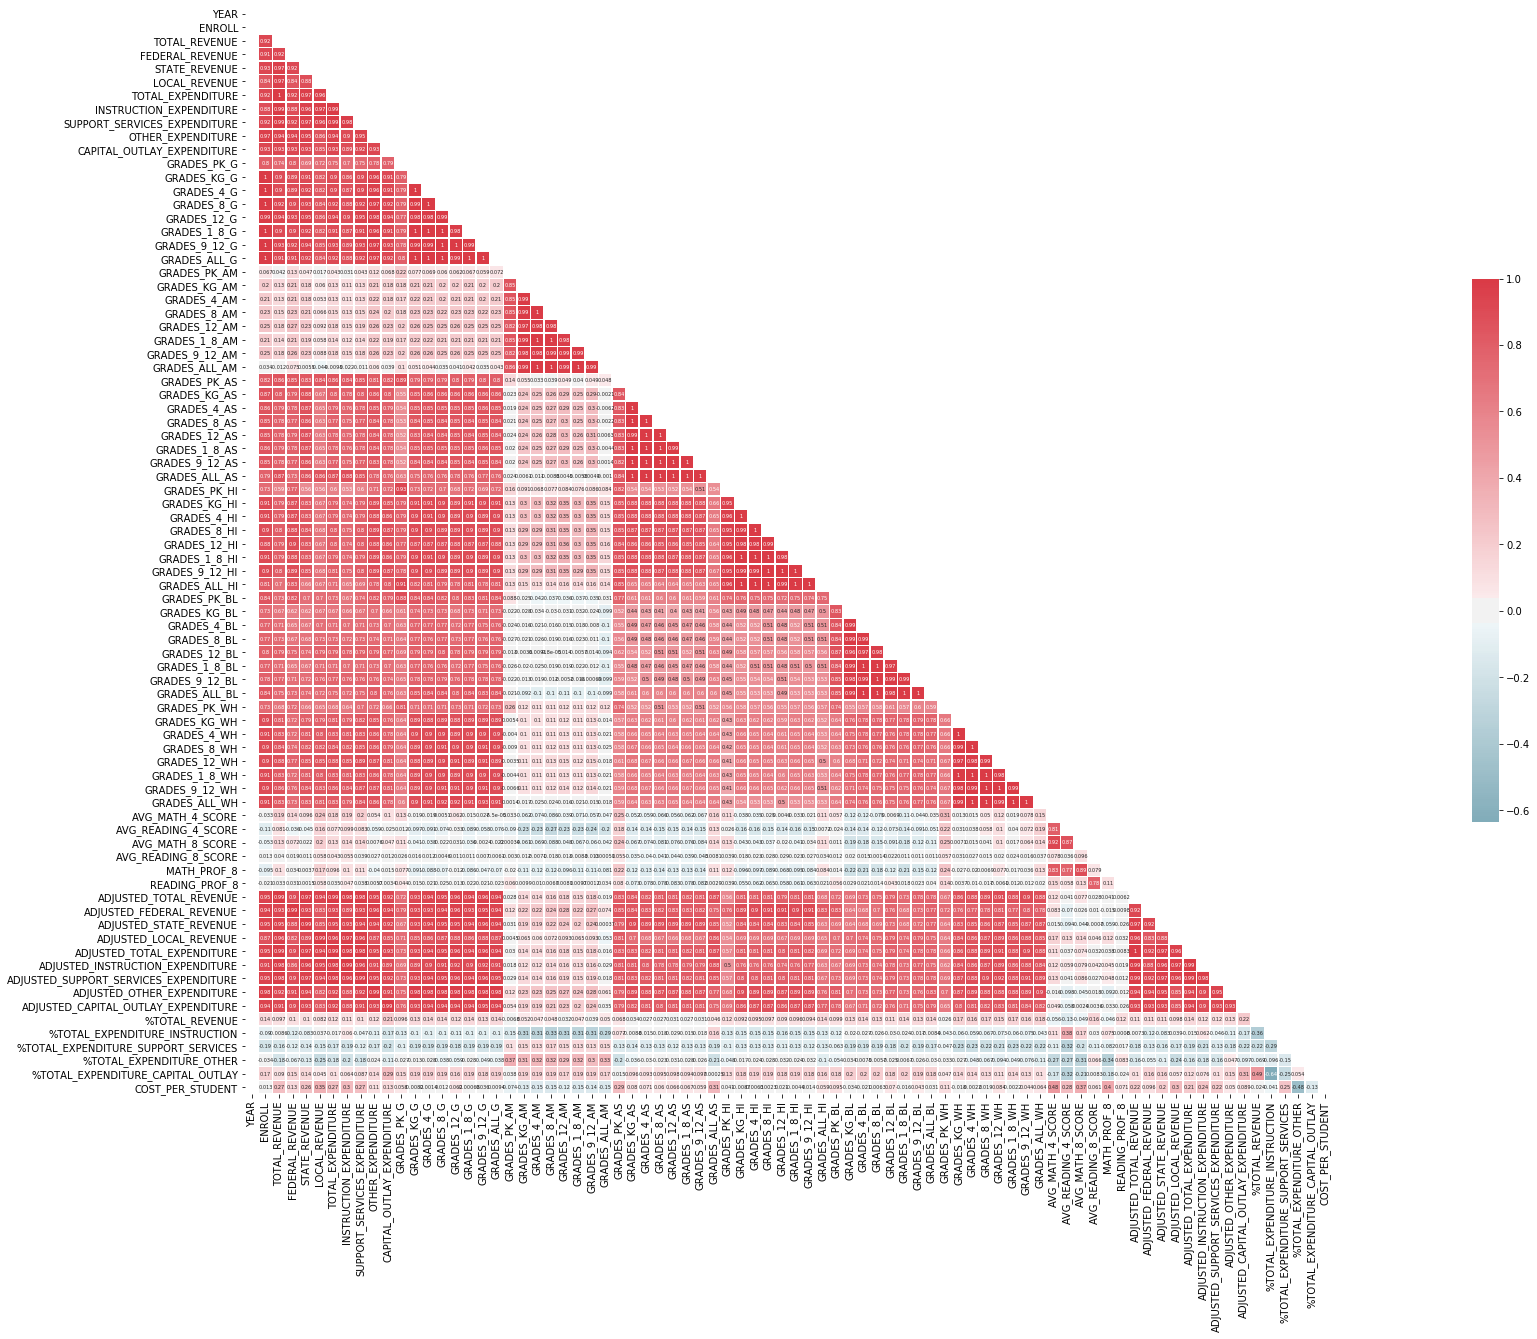

In [72]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, annot_kws={"size": 5},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### *Predictive Power Score*
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598
https://github.com/8080labs/ppscore/blob/master/examples/titanic_dataset.ipynb

In [73]:
!pip install ppscore

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
import ppscore as pps
matrix = pps.matrix(train.drop(['GRADES_PK_AM','GRADES_KG_AM', 'GRADES_4_AM', 'GRADES_8_AM', 
                                'GRADES_12_AM','GRADES_1_8_AM','GRADES_9_12_AM','GRADES_ALL_AM', 
                                'GRADES_PK_AS','GRADES_KG_AS', 'GRADES_4_AS', 'GRADES_8_AS', 
                                'GRADES_12_AS','GRADES_1_8_AS','GRADES_9_12_AS','GRADES_ALL_AS', 
                                'GRADES_PK_HI','GRADES_KG_HI', 'GRADES_4_HI', 'GRADES_8_HI', 
                                'GRADES_12_HI','GRADES_1_8_HI','GRADES_9_12_HI','GRADES_ALL_HI',
                                'GRADES_PK_BL','GRADES_KG_BL', 'GRADES_4_BL', 'GRADES_8_BL', 
                                'GRADES_12_BL','GRADES_1_8_BL','GRADES_9_12_BL','GRADES_ALL_BL', 
                                'GRADES_PK_WH','GRADES_KG_WH', 'GRADES_4_WH', 'GRADES_8_WH', 
                                'GRADES_12_WH','GRADES_1_8_WH','GRADES_9_12_WH', 'GRADES_ALL_WH'], axis=1))
matrix

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
STATE,1.000000,2.761227e-07,0.454119,0.065862,0.036746,0.059575,0.057371,0.042343,0.062419,0.067341,...,0.161936,0.114823,0.249525,0.106232,0.037638,0.074643,0.070379,0.111533,0.040259,0.032001
YEAR,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ENROLL,0.865019,0.000000e+00,1.000000,0.491458,0.405911,0.571115,0.388392,0.517616,0.510238,0.557797,...,0.586047,0.585123,0.770845,0.606991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TOTAL_REVENUE,0.590114,0.000000e+00,0.587249,1.000000,0.498250,0.747141,0.696824,0.929722,0.874386,0.884069,...,0.751113,0.784313,0.561739,0.461091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FEDERAL_REVENUE,0.380970,0.000000e+00,0.466147,0.436353,1.000000,0.510256,0.240454,0.393783,0.380023,0.479096,...,0.269480,0.356642,0.434277,0.304983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
STATE_REVENUE,0.598257,0.000000e+00,0.601019,0.706814,0.396753,1.000000,0.467056,0.716127,0.660293,0.734002,...,0.660555,0.726605,0.600135,0.452624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LOCAL_REVENUE,0.611157,0.000000e+00,0.517123,0.714254,0.384904,0.523110,1.000000,0.736109,0.746401,0.682877,...,0.664368,0.692130,0.436780,0.324092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TOTAL_EXPENDITURE,0.588949,0.000000e+00,0.594591,0.926624,0.496848,0.740777,0.691789,1.000000,0.864735,0.875713,...,0.766246,0.790414,0.576876,0.487879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INSTRUCTION_EXPENDITURE,0.599155,0.000000e+00,0.580930,0.861754,0.457438,0.687311,0.714929,0.857950,1.000000,0.791394,...,0.808274,0.732275,0.534264,0.415986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUPPORT_SERVICES_EXPENDITURE,0.580297,0.000000e+00,0.577170,0.853638,0.515756,0.732079,0.667117,0.855773,0.783622,1.000000,...,0.695502,0.810792,0.557663,0.449345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


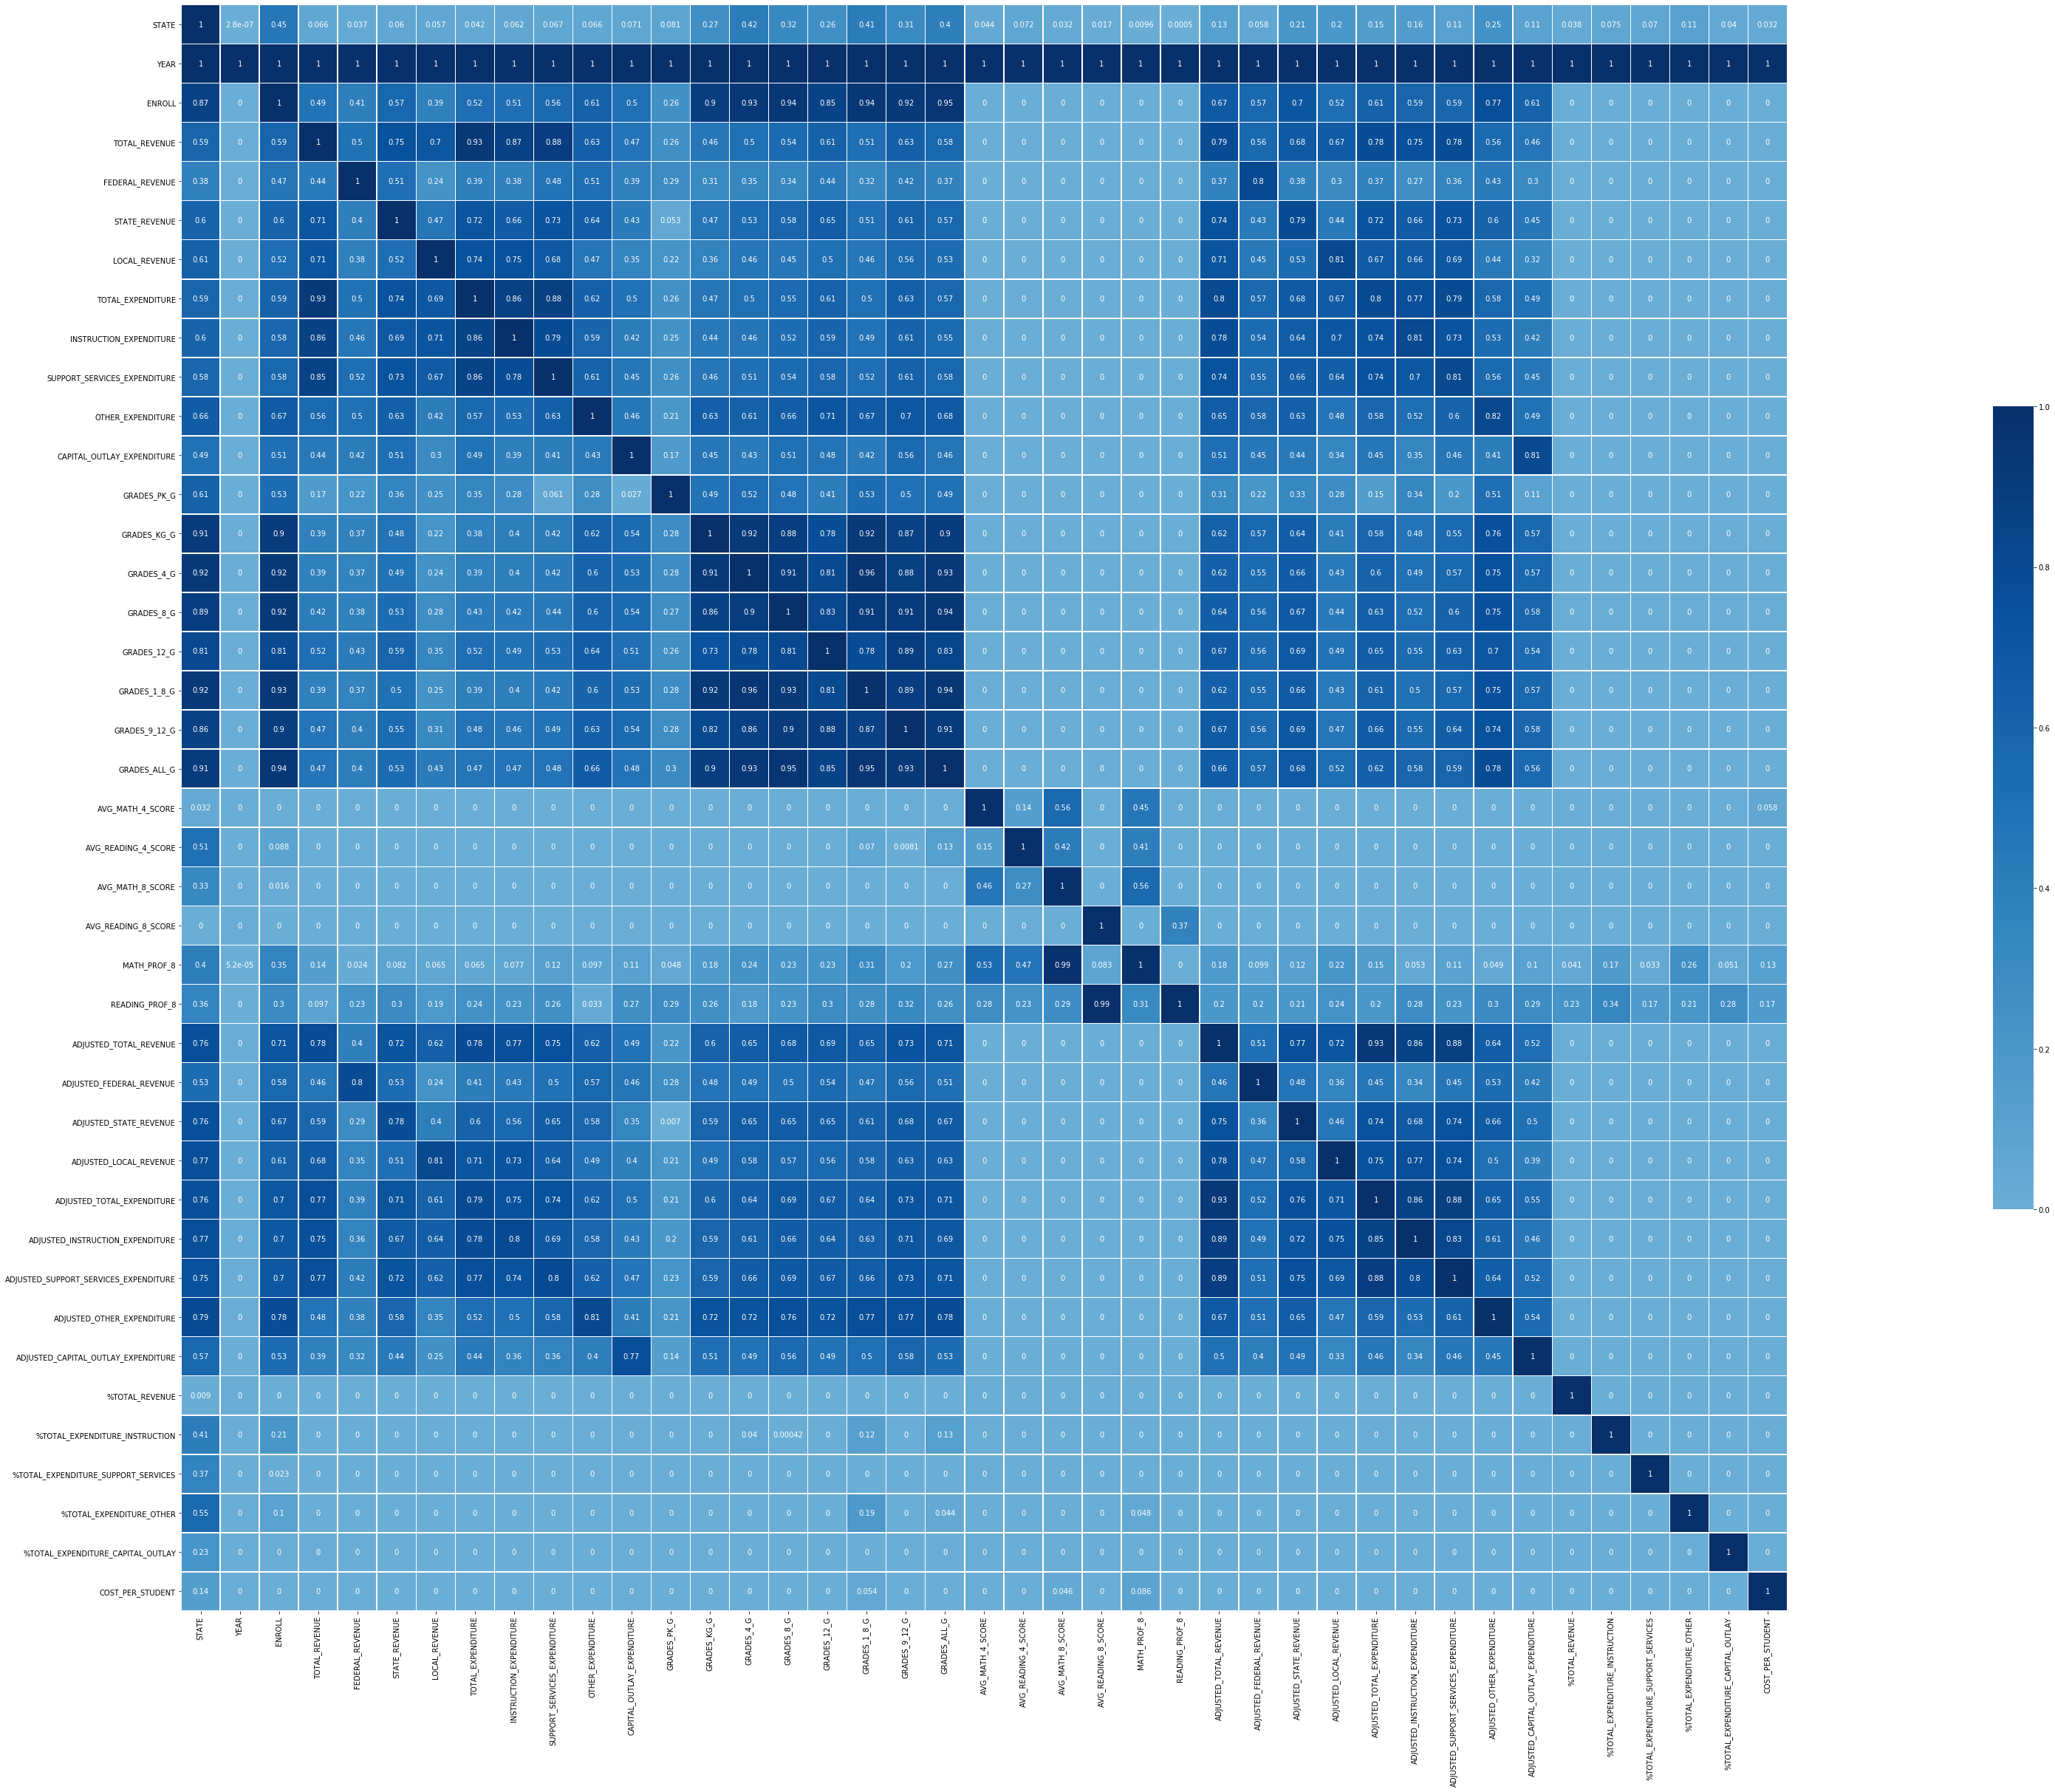

In [76]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 40))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, cmap='Blues', center=0, annot=True, annot_kws={"size": 10},
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# ***Fit a Model***

In [77]:
features = ['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE','AVG_MATH_4_SCORE',
       'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 
       'MATH_PROF_8', 'ADJUSTED_TOTAL_REVENUE',
       'ADJUSTED_FEDERAL_REVENUE', 'ADJUSTED_STATE_REVENUE',
       'ADJUSTED_LOCAL_REVENUE', 'ADJUSTED_TOTAL_EXPENDITURE',
       'ADJUSTED_INSTRUCTION_EXPENDITURE',
       'ADJUSTED_SUPPORT_SERVICES_EXPENDITURE', 'ADJUSTED_OTHER_EXPENDITURE',
       'ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE', '%TOTAL_REVENUE',
       '%TOTAL_EXPENDITURE_INSTRUCTION', '%TOTAL_EXPENDITURE_SUPPORT_SERVICES',
       '%TOTAL_EXPENDITURE_OTHER', '%TOTAL_EXPENDITURE_CAPITAL_OUTLAY',
       'COST_PER_STUDENT']

target = 'READING_PROF_8'

In [78]:
# Arrange data into X features matrix and y target vector

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

## ***Random Forest***

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
# Random forest model

#Fit on train, score on val
rf1 = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                           max_depth=None, min_samples_split=5, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                           max_features=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, 
                           bootstrap=False, oob_score=False, n_jobs=-1, 
                           random_state=42, verbose=2, warm_start=True, 
                           class_weight='balanced')
)

rf1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000building tree 4 of 1000


building tree 5 of 1000building tree 6 of 1000
building tree 7 of 1000

building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000building tree 12 of 1000

building tree 13 of 1000building tree 14 of 1000

building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000building tree 27 of 1000
building tree 28 of 1000

building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000building tree 33 of 1000

building tree 34 of 1000building tree 35 of 1000

building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000building tree 39 of 1000

building tree 40 of 1000building t

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.2s



building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000building tree 68 of 1000
building tree 69 of 1000

building tree 70 of 1000
building tree 71 of 1000building tree 72 of 1000
building tree 73 of 1000

building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000
building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000
building tree 89 of 1000
building tree 90 of 1000building tree 91 of 1000

building tree 92 of 1000
building tree 93 of 1000building tree 94 of 1000

building tree 95 of 1000building tree 96 of 1000
building tree 97 of 1000

building tree 98 of 1000
building tree 99 of 1000
building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000
building tree 103 of 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.3s




building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000building tree 183 of 1000

building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000building tree 189 of 1000building tree 190 of 1000

building tree 191 of 1000

building tree 192 of 1000
building tree 193 of 1000building tree 194 of 1000

building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000
building tree 200 of 1000
building tree 201 of 1000
building tree 202 of 1000
building tree 203 of 1000
building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000building tree 207 of 1000
building tree 208 of 1000

building tree 209 of 1000
building tree 210 of 1000
building tree 211 of 1000
building tree 212 of 1000
building t

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    3.1s


building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000

building tree 365 of 1000
building tree 366 of 1000building tree 367 of 1000
building tree 368 of 1000

building tree 369 of 1000building tree 370 of 1000

building tree 371 of 1000
building tree 372 of 1000building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000

building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000building tree 382 of 1000

building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000building tree 388 of 1000

building tree 389 of 1000building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000building tree 393 of 1000

building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000

building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    5.8s



building tree 662 of 1000
building tree 663 of 1000building tree 664 of 1000

building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000building tree 684 of 1000

building tree 685 of 1000
building tree 686 of 1000building tree 687 of 1000

building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000building tree 697 of 1000

building tree 698 of 1000
building tree 699 of 1000building tre

building tree 986 of 1000building tree 987 of 1000

building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000building tree 992 of 1000

building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.1s finished


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=-1,
    

In [81]:
# Val accuracy
print('Train Accuracy', rf1.score(X_train, y_train))
print('Validation Accuracy', rf1.score(X_val, y_val))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s


Train Accuracy 0.9721115537848606
Validation Accuracy 0.5087719298245614


[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [82]:
print('Test Accuracy', rf1.score(X_test, y_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Test Accuracy 0.6078431372549019


In [83]:
rf1.named_steps

{'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'randomforestclassifier': RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                        criterion='entropy', max_depth=None, max_features=None,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=-1, oob_score=False, random_state=42, verbose=2,
                        warm_start=True)}

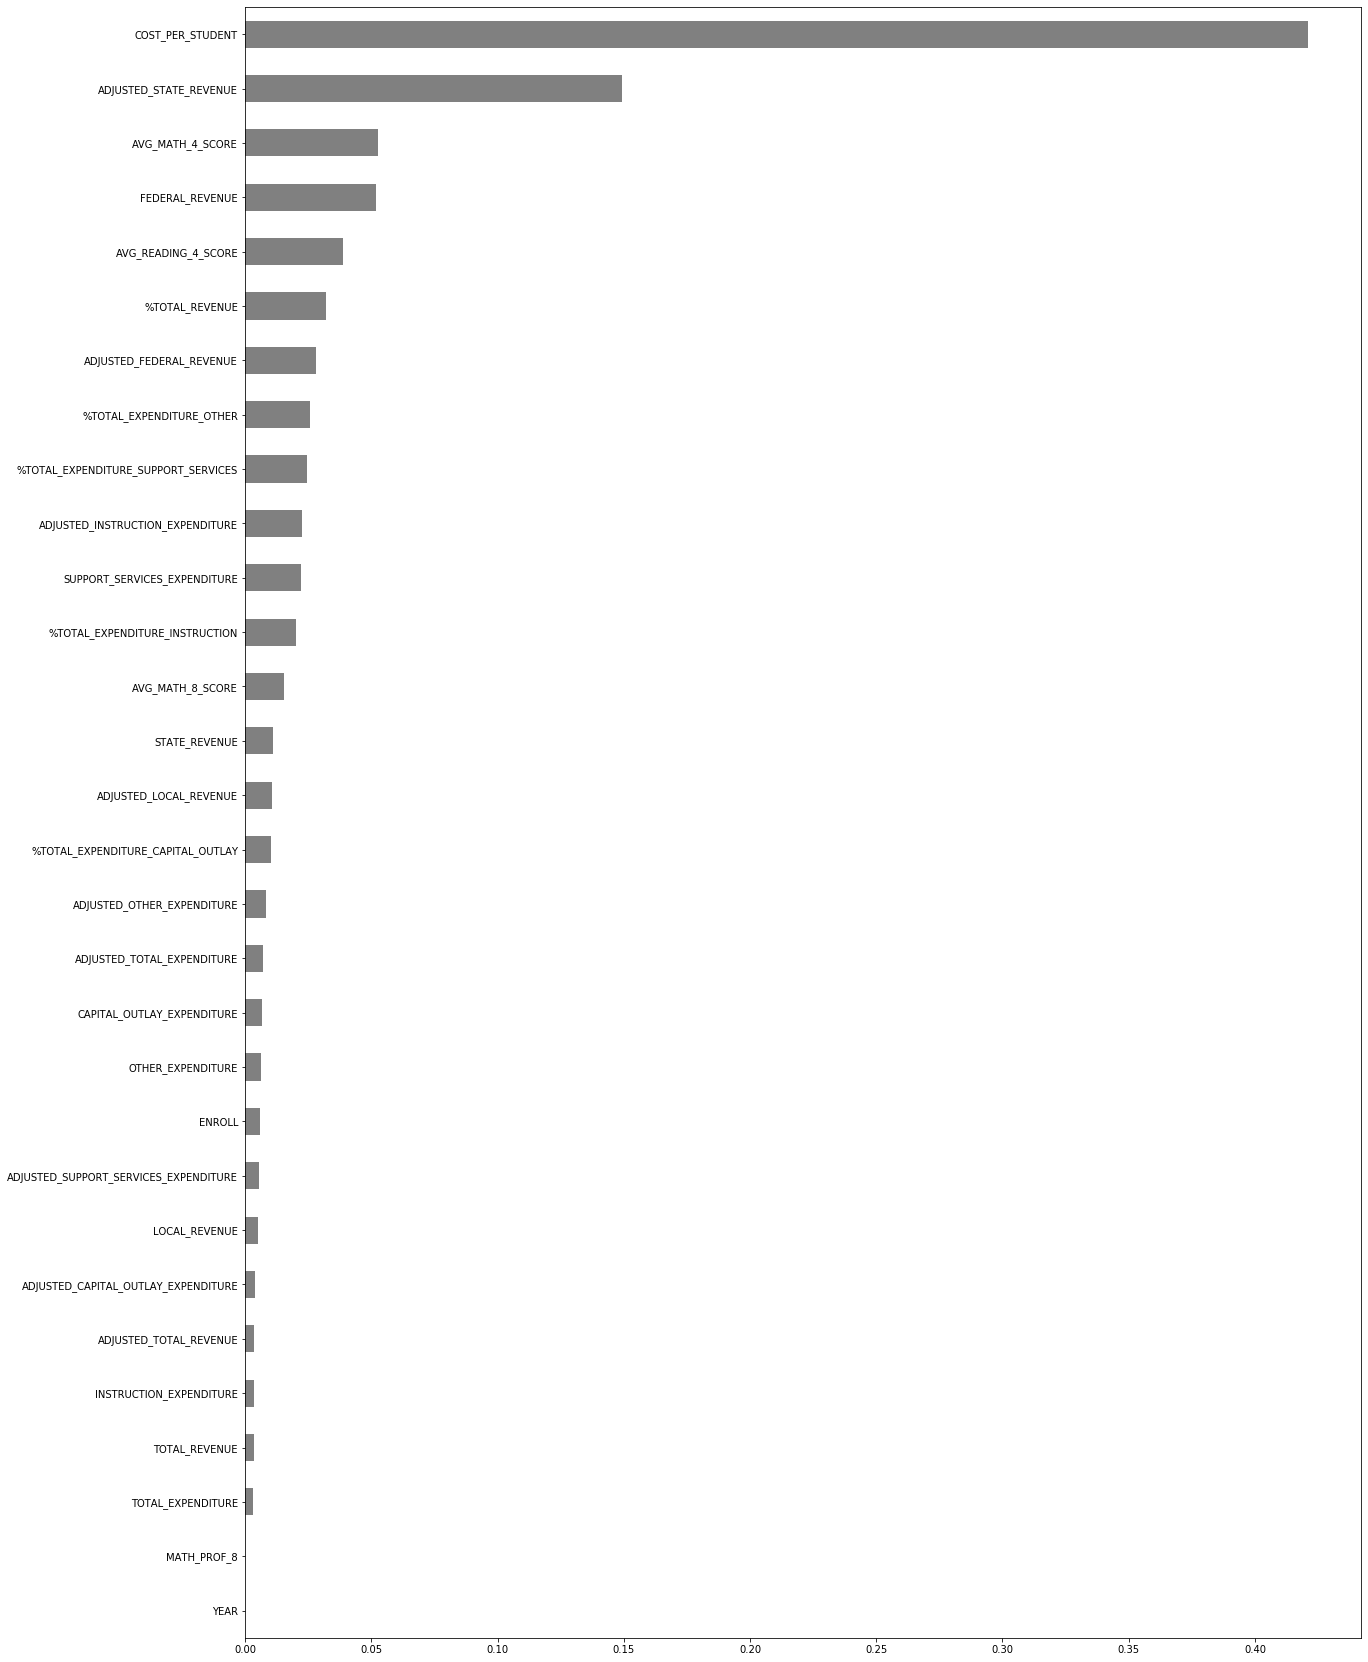

In [84]:
# Plot the feature importances
model = rf1.named_steps['randomforestclassifier']
importances = pd.Series(model.feature_importances_, X_train.columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='grey');

# ***Visualize Features***

## ***Valdiation Metrics***

In [85]:
processor = make_pipeline(
    SimpleImputer(strategy = 'median')
)

In [86]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)
X_test_processed = processor.transform(X_test)

In [87]:
X_train_processed.shape, X_val_processed.shape, X_test_processed.shape

((251, 30), (171, 30), (102, 30))

In [88]:
model_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                  criterion='gini', max_depth=None, max_features='auto',
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=1, min_samples_split=2,
                                  min_weight_fraction_leaf=0.0, n_estimators=100,
                                  n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                                  warm_start=False)

In [89]:
model_rf.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [90]:
model_rf.score(X_val_processed, y_val)

0.4678362573099415

In [91]:
model_rf.score(X_test_processed, y_test)

0.5

### ***Confusion Matrix***

A **confusion matrix** is a table that is used to evaluate the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [92]:
conda install -c conda-forge/label/cf201901 scikit-plot

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
y_pred = model_rf.predict(X_val_processed)

In [95]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[ 0  1  1]
 [ 0 51 41]
 [ 0 48 29]]


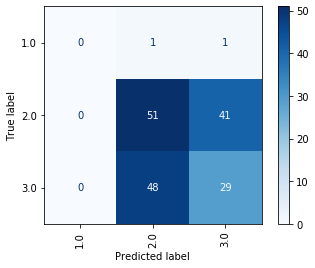

In [96]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_rf, X_val_processed, y_val, 
                      xticks_rotation='vertical', 
                      values_format='.0f',
                      cmap='Blues');

### ***Permutation Importances***

In [97]:
!pip install eli5

In [98]:
import eli5

In [99]:
from eli5.sklearn import PermutationImportance

In [100]:
permuter = PermutationImportance(
    model_rf,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_processed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [101]:
permuter.feature_importances_

array([ 0.        , -0.01169591, -0.0128655 , -0.00818713, -0.01520468,
       -0.01403509, -0.01520468,  0.00350877, -0.00935673, -0.01754386,
       -0.01052632,  0.00233918, -0.01052632,  0.00350877, -0.00233918,
       -0.00935673,  0.00116959, -0.02690058, -0.01169591, -0.00350877,
        0.00467836, -0.01052632,  0.00116959, -0.0128655 , -0.00350877,
       -0.00116959, -0.00350877,  0.        , -0.00350877, -0.00233918])

In [102]:
eli5.show_weights(
    permuter,
    top = None,
    feature_names = X_val.columns.to_list()
)

Weight,Feature
0.0047 ± 0.0227,ADJUSTED_INSTRUCTION_EXPENDITURE
0.0035 ± 0.0159,INSTRUCTION_EXPENDITURE
0.0035 ± 0.0327,AVG_MATH_8_SCORE
0.0023 ± 0.0319,AVG_MATH_4_SCORE
0.0012 ± 0.0172,ADJUSTED_OTHER_EXPENDITURE
0.0012 ± 0.0334,ADJUSTED_FEDERAL_REVENUE
0 ± 0.0000,YEAR
0.0000 ± 0.0165,%TOTAL_EXPENDITURE_OTHER
-0.0012 ± 0.0155,%TOTAL_EXPENDITURE_INSTRUCTION
-0.0023 ± 0.0119,COST_PER_STUDENT


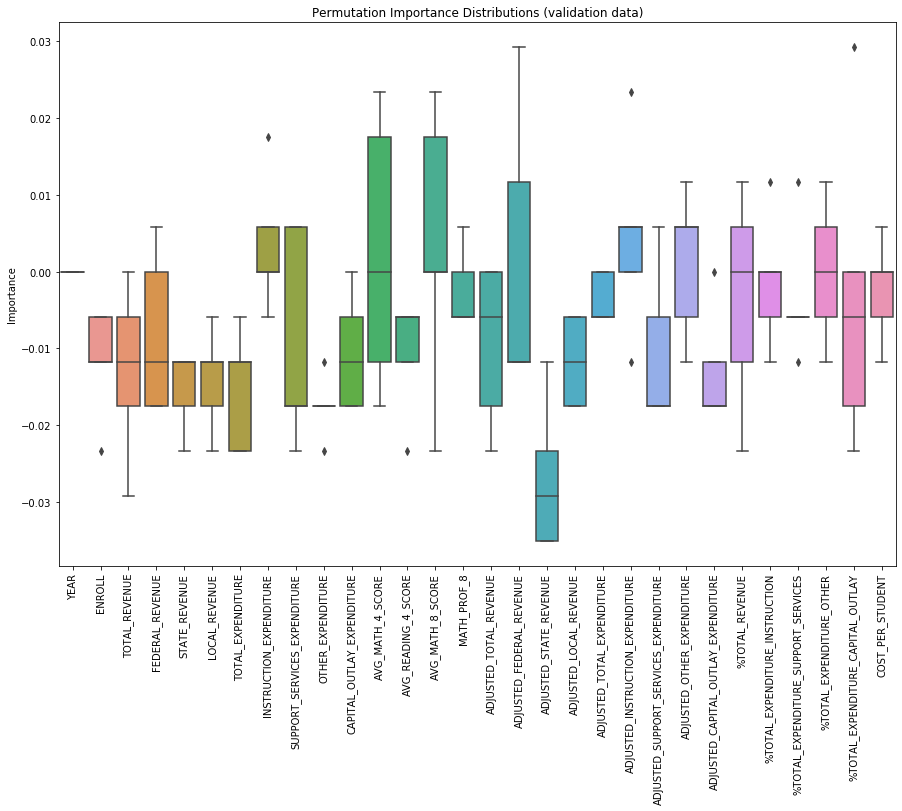

In [103]:
permuter_df = pd.DataFrame(data = permuter.results_, 
                          columns = X_val.columns.to_list())
fig, ax = plt.subplots(figsize =(15, 10))
ax = sns.boxplot(data=permuter_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set(title='Permutation Importance Distributions (validation data)',ylabel='Importance');

In [104]:
print('Shape before removing features', X_train.shape)

Shape before removing features (251, 30)


In [105]:
minimum_importance = 0 
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_permuted = X_train[features]

In [106]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (251, 30)


In [107]:
X_val_permuted = X_val[features]
X_test_permuted = X_test[features]

pipeline_rf = make_pipeline(
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=1000, criterion='entropy', 
                           max_depth=None, min_samples_split=5, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                           max_features=None, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, 
                           bootstrap=False, oob_score=False, n_jobs=-1, 
                           random_state=42, verbose=2, warm_start=True, 
                           class_weight='balanced')
)

# Fit on train, score on val
pipeline_rf.fit(X_train_permuted, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s


building tree 1 of 1000building tree 2 of 1000
building tree 3 of 1000

building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000building tree 7 of 1000

building tree 8 of 1000building tree 9 of 1000

building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000building tree 18 of 1000

building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000building tree 24 of 1000

building tree 25 of 1000
building tree 26 of 1000building tree 27 of 1000
building tree 28 of 1000

building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000building tree 35 of 1000building tree 36 of 1000


building tree 37 of 1000
building tree 38 of 1000building tree 39 of 1000
building tree 40 of 1000

building 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    0.6s



building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000building tree 182 of 1000
building tree 183 of 1000building tree 184 of 1000

building tree 185 of 1000building tree 186 of 1000
building tree 187 of 1000


building tree 188 of 1000building tree 189 of 1000building tree 190 of 1000


building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000building tree 194 of 1000

building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000building tree 198 of 1000building tree 199 of 1000


building tree 200 of 1000building tree 201 of 1000
building tree 202 of 1000

building tree 203 of 1000
building tree 204 of 1000building tree 205 of 1000

building tree 206 of 1000building tree 207 of 1000
building tree 208 of 1000
building tree 209 of 1000

building tree 210 of 1000building tree 211 of 1000building tree 212 of 1000


building tree 213 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:    1.3s


building tree 396 of 1000
building tree 397 of 1000building tree 398 of 1000

building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000building tree 408 of 1000

building tree 409 of 1000building tree 410 of 1000

building tree 411 of 1000
building tree 412 of 1000building tree 413 of 1000

building tree 414 of 1000building tree 415 of 1000

building tree 416 of 1000
building tree 417 of 1000
building tree 418 of 1000
building tree 419 of 1000
building tree 420 of 1000
building tree 421 of 1000
building tree 422 of 1000building tree 423 of 1000

building tree 424 of 1000building tree 425 of 1000

building tree 426 of 1000
building tree 427 of 1000building tree 428 of 1000
building tree 429 of 1000building tree 430 of 1000

building tree 431 of 1000

building tree 432 of 1000building tree 433 of 1000
building tree

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:    2.4s



building tree 669 of 1000building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000

building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000building tree 681 of 1000
building tree 682 of 1000

building tree 683 of 1000
building tree 684 of 1000building tree 685 of 1000

building tree 686 of 1000building tree 687 of 1000

building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000

building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000building tree 700 of 1000

building tree 701 of 1000building tree 702 of 1000building tree 703 of 1000


building tree 704 of 1000
building tree 705 of 1000
building tree 706 of 1000
building tr

building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000building tree 992 of 1000

building tree 993 of 1000building tree 994 of 1000
building tree 995 of 1000

building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000building tree 999 of 1000building tree 1000 of 1000




[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=-1,
  

In [111]:
print('Test Accuracy:', pipeline_rf.score(X_test_permuted, y_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s


Test Accuracy: 0.5392156862745098


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


### ***Partial Dependence Plot***

In [112]:
!pip install pdpbox

In [113]:
plt.rcParams['figure.dpi'] = 72

#### ***PDP_Isolate***

In [114]:
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot

In [115]:
min(X_train['INSTRUCTION_EXPENDITURE']), max(X_train['INSTRUCTION_EXPENDITURE'])

(315009.0, 38756656.0)

In [116]:
feature = 'INSTRUCTION_EXPENDITURE'

isolated = pdp_isolate(
    model = rf1, 
    dataset = X_val, 
    model_features = X_val.columns, 
    feature = feature,
    num_grid_points = 50
)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Don

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Don

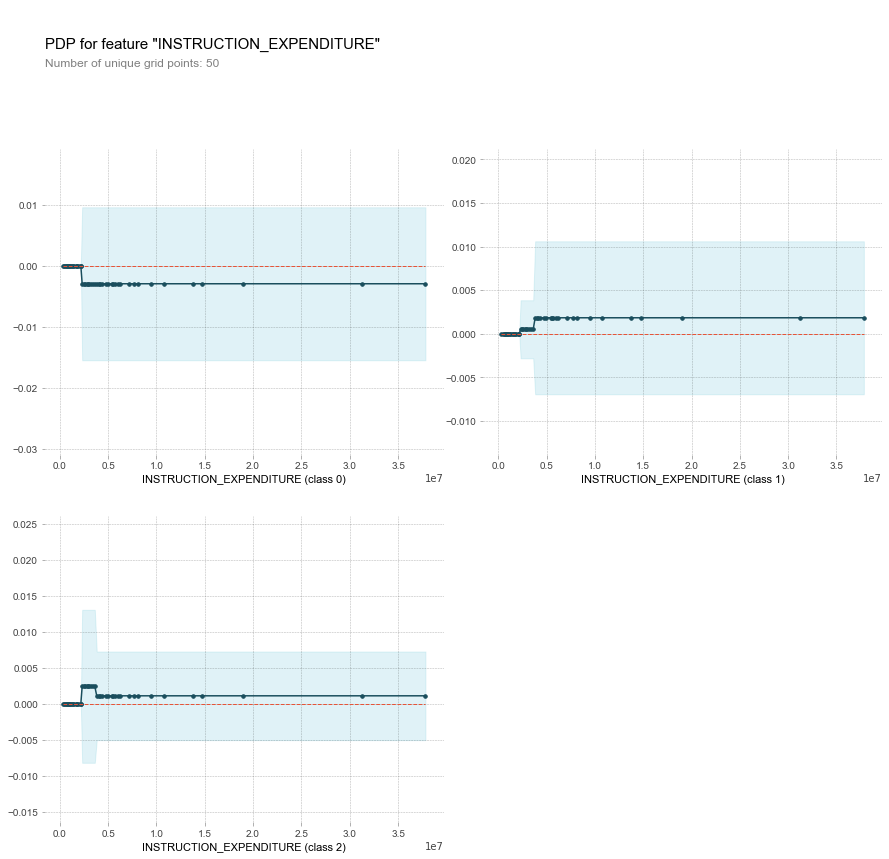

In [117]:
pdp_plot(isolated, feature_name = feature);

(0, 10)

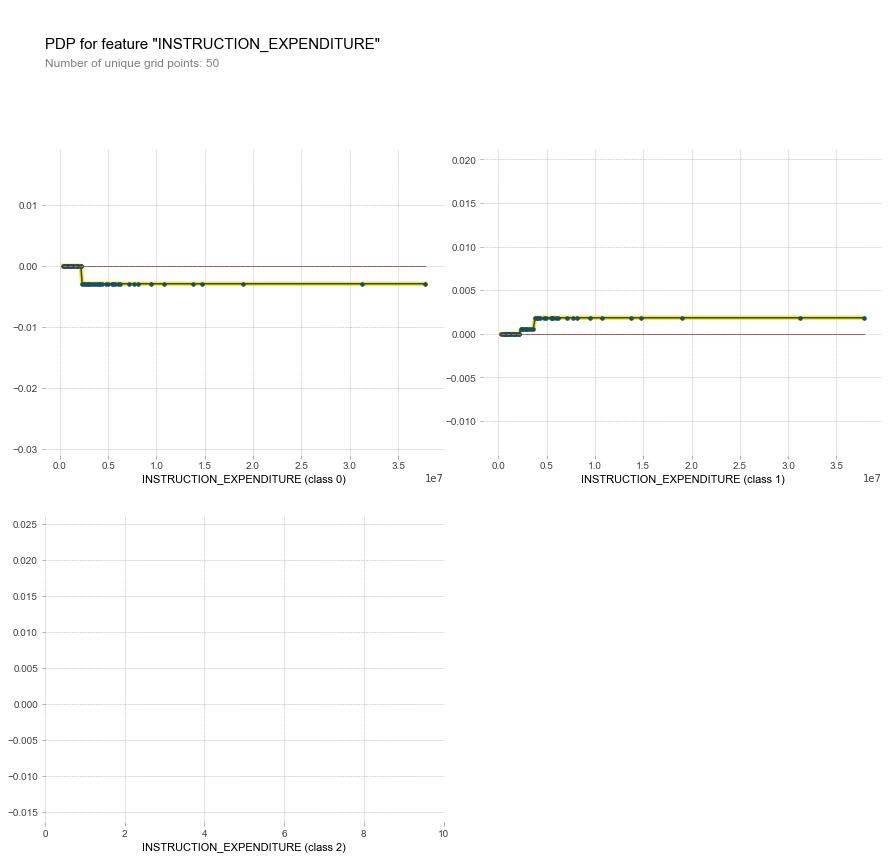

In [118]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=10)
plt.xlim(0, 10)

#### ***Feature Interaction***

In [119]:
!pip install PDPbox

In [120]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent work

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jo

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Paral

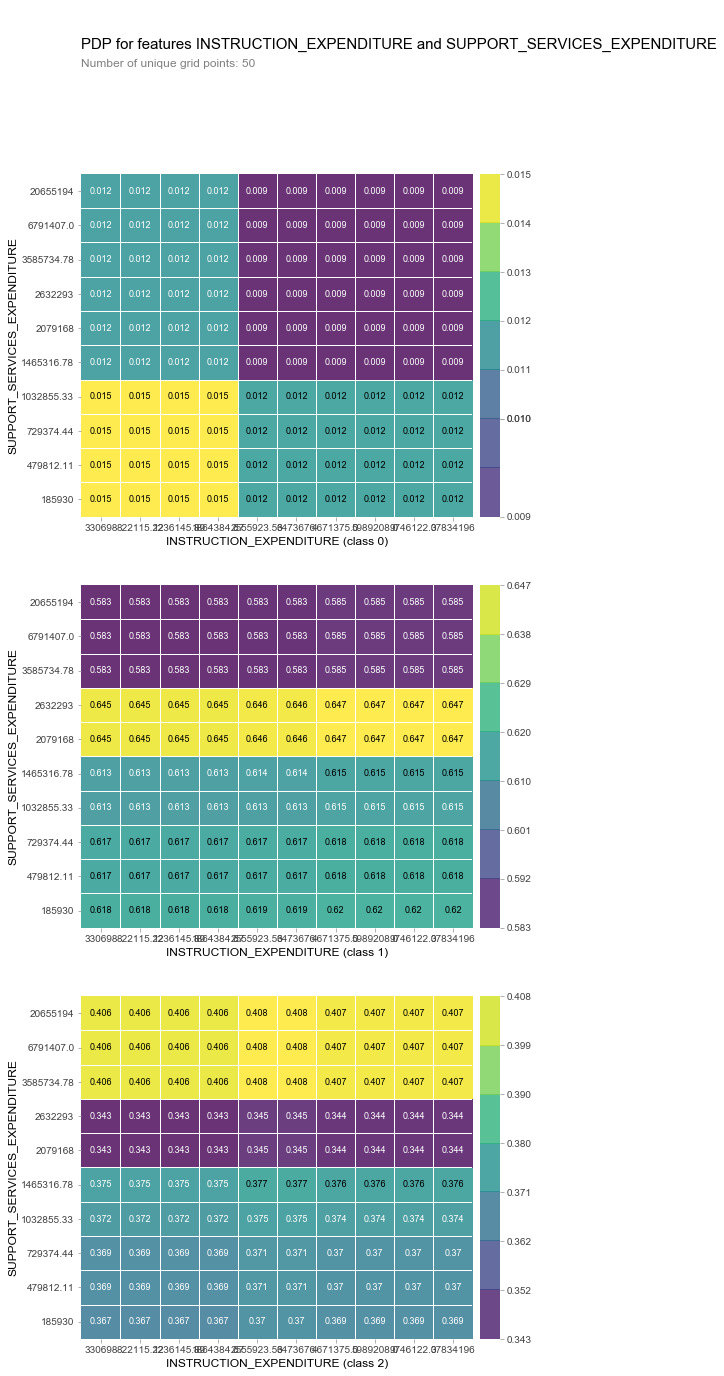

In [121]:
features= 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE'
n_grids = 50

interaction = pdp_interact(
    model = rf1,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

plot_params = {
                # plot title and subtitle
                'title': 'PDP for features %s and %s' % features,
                'subtitle': "Number of unique grid points: %d" % n_grids,
                'title_fontsize': 15,
                'subtitle_fontsize': 12,
                'font_family': 'Arial',
                # matplotlib color map for ICE lines
                'line_cmap': 'Blues',
                'xticks_rotation': 45,
                # pdp line color, highlight color and line width
                'pdp_color': '#1A4E5D',
                'pdp_hl_color': '#FEDC00',
                'pdp_linewidth': 1.5,
                # horizon zero line color and with
                'zero_color': '#E75438',
                'zero_linewidth': 1,
                # pdp std fill color and alpha
                'fill_color': '#66C2D7',
                'fill_alpha': 0.2,
                # marker size for pdp line
                'markersize': 3.5,
            }

pdp_interact_plot(interaction, 
                  features, 
                  plot_type='grid',
                  x_quantile=False,
                  ncols=1,
                  plot_params = plot_params
                  );

### Shapley Value

In [122]:
!pip install shap

In [123]:
import shap

In [124]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
1178,1970,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,2414860.0,594283.0,...,4.117701e+06,2.604775e+06,641019.880139,550206.67204,1.019235,0.508875,0.321904,0.079219,0.067996,10.20689


In [125]:
y_test.iloc[[0]]

1178    3.0
Name: READING_PROF_8, dtype: float64

In [126]:
explainer=shap.TreeExplainer(model, feature_perturbation='interventional')
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed, check_additivity = False, approximate=False)

shap.initjs()


shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=row,
    link='logit'               # For classification, this returns predicted probs
)


In [127]:
#Explanations for the whole X_val dataset

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val_processed, check_additivity=False)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_val_processed,
    feature_names = features
)


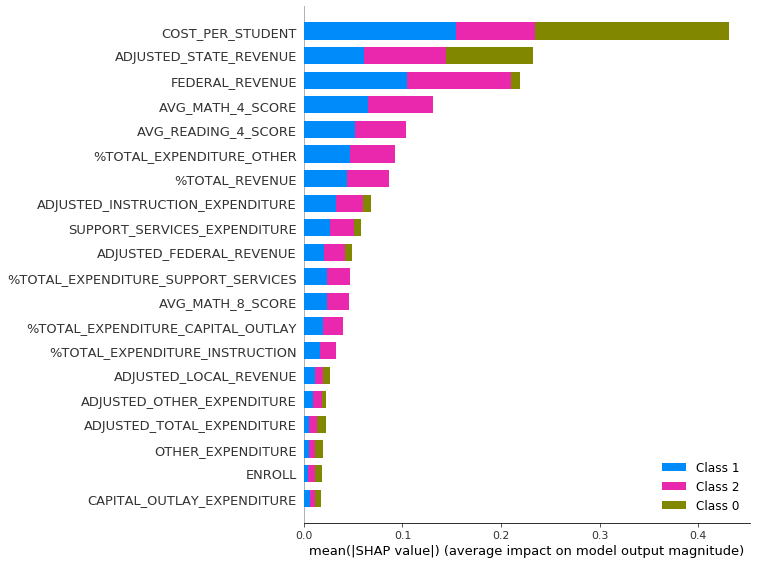

In [128]:
shap.summary_plot(shap_values, X_val, auto_size_plot=False)

# Test Model

I want to create an application that is easy to use and utilizes the most predictive features from the 81 features that I started with. Below I am going to compare how much accuracy I sacrifice by going from 30 features to 8.

In [129]:
print('Test Accuracy', rf1.score(X_test, y_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.2s


Test Accuracy 0.6078431372549019


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [130]:
columns=['COST_PER_STUDENT','AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 
         'ADJUSTED_TOTAL_EXPENDITURE', 'ENROLL', '%TOTAL_EXPENDITURE_INSTRUCTION', 
         '%TOTAL_EXPENDITURE_SUPPORT_SERVICES', 'ADJUSTED_OTHER_EXPENDITURE']
target = 'READING_PROF_8'

X_train_new = train[columns]
y_train = train[target]
X_val_new = val[columns]
y_val = val[target]
X_test_new = test[columns]
y_test = test[target]

In [131]:
#Make Pipeline
new_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=300, 
                           n_jobs=-1, 
                           random_state=42))

In [132]:
# Fit on train, score on val
new_pipeline.fit(X_train_new, y_train)
print('Validation Accuracy', new_pipeline.score(X_val_new, y_val))

Validation Accuracy 0.4853801169590643


In [133]:
# Score on test
print('Test Accuracy', new_pipeline.score(X_test_new, y_test))

Test Accuracy 0.5588235294117647


In [134]:
print(f'Difference between 30 feature model and 8 feature model{rf1.score(X_test, y_test)-new_pipeline.score(X_test_new, y_test) }')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Difference between 30 feature model and 8 feature model0.04901960784313719


# Making Predictions

### Feature Parameters

In [135]:
train['COST_PER_STUDENT'].describe()

count    228.000000
mean      10.805923
std        3.871063
min        4.504998
25%        8.089635
50%       10.290626
75%       12.364053
max       29.348515
Name: COST_PER_STUDENT, dtype: float64

In [136]:
min(train['COST_PER_STUDENT']), max(train['COST_PER_STUDENT'])

(4.504997994447996, 29.348514672277652)

In [137]:
train['AVG_MATH_4_SCORE'].describe()

count    251.000000
mean     233.307769
std       10.906790
min      192.600553
25%      226.864197
50%      236.254108
75%      241.157611
max      253.396456
Name: AVG_MATH_4_SCORE, dtype: float64

In [138]:
min(train['AVG_MATH_4_SCORE']), max(train['AVG_MATH_4_SCORE'])

(192.60055314202802, 253.39645576405)

In [139]:
train['AVG_READING_4_SCORE'].describe()

count    251.000000
mean     218.185730
std        8.163315
min      178.557612
25%      213.518322
50%      219.763258
75%      223.814584
max      236.773867
Name: AVG_READING_4_SCORE, dtype: float64

In [140]:
min(train['AVG_READING_4_SCORE']), max(train['AVG_READING_4_SCORE'])

(178.557611651728, 236.773866580369)

In [141]:
train['ADJUSTED_TOTAL_EXPENDITURE'].describe()

count    2.510000e+02
mean     1.234840e+07
std      1.549713e+07
min      9.597246e+05
25%      3.069460e+06
50%      6.835090e+06
75%      1.367847e+07
max      8.909639e+07
Name: ADJUSTED_TOTAL_EXPENDITURE, dtype: float64

In [142]:
min(train['ADJUSTED_TOTAL_EXPENDITURE']), max(train['ADJUSTED_TOTAL_EXPENDITURE'])

(959724.5828644942, 89096394.78738865)

In [143]:
train['%TOTAL_EXPENDITURE_INSTRUCTION'].describe()

count    251.000000
mean       0.520349
std        0.042654
min        0.370584
25%        0.493872
50%        0.518250
75%        0.549364
max        0.644874
Name: %TOTAL_EXPENDITURE_INSTRUCTION, dtype: float64

In [144]:
min(train['%TOTAL_EXPENDITURE_INSTRUCTION']), max(train['%TOTAL_EXPENDITURE_INSTRUCTION'])

(0.37058384479865675, 0.6448742419539405)

In [145]:
train['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'].describe()

count    251.000000
mean       0.297510
std        0.033039
min        0.219196
25%        0.277134
50%        0.296254
75%        0.316547
max        0.500568
Name: %TOTAL_EXPENDITURE_SUPPORT_SERVICES, dtype: float64

In [146]:
min(train['%TOTAL_EXPENDITURE_SUPPORT_SERVICES']), max(train['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'])

(0.21919646406620297, 0.5005676479115797)

### Define Predict Function

In [147]:
def predict(ENROLL, COST_PER_STUDENT, AVG_MATH_4_SCORE, 
            AVG_READING_4_SCORE, 
            ADJUSTED_TOTAL_EXPENDITURE,
            TOTAL_EXPENDITURE_INSTRUCTION, 
            TOTAL_EXPENDITURE_SUPPORT_SERVICES, 
            ADJUSTED_OTHER_EXPENDITURE):
    
    # Make dataframe from the inputs
    df = pd.DataFrame(
        data=[[ENROLL, COST_PER_STUDENT, AVG_MATH_4_SCORE, 
               AVG_READING_4_SCORE, 
               ADJUSTED_TOTAL_EXPENDITURE,
               TOTAL_EXPENDITURE_INSTRUCTION, 
               TOTAL_EXPENDITURE_SUPPORT_SERVICES,
               ADJUSTED_OTHER_EXPENDITURE]], 
        columns=['ENROLL','COST_PER_STUDENT','AVG_MATH_4_SCORE', 
                 'AVG_READING_4_SCORE', 
                 'ADJUSTED_TOTAL_EXPENDITURE',
                 '%TOTAL_EXPENDITURE_INSTRUCTION', 
                 '%TOTAL_EXPENDITURE_SUPPORT_SERVICES', 
                 'ADJUSTED_OTHER_EXPENDITURE'])
    
    # Get the model's prediction
    pred = new_pipeline.predict(df)[0]
    
    return f'{pred}'

In [148]:
predict(50000, 10, 240, 200, 60000000, 0.5, 0.3, 2000000)

'3.0'